# Curse of dimensionality

In [1]:
import numpy as np
import numpy.random as npr

## Generating datasets for 200 dimentions

In [2]:
# Here are constants for our task
DIMENTIONS = 200
POINTS_NUMBER = 100
MIN_BOUND = -1
MAX_BOUND = 1


# It is an array for datasets of points
# each element of array is numpy.Array with 100 d-sized numpy arrays
datasets = []


for i in range(0, DIMENTIONS):
    datasets.append(npr.uniform(-1.0, 1.0, size=(POINTS_NUMBER, i)))


## Calculating max and min Euclidean distanse from point x in dataset

In [7]:
# Function to calculate Euclidean distance between two d-dimensional points
# Returns float distanse if ok
# Returns None if dimensions are not the same
def calculate_distanse(point1, point2):
    if len(point1) != len(point2):
        return None
    
    dimension = len(point1)
    
    return sum((point1[i] - point2[i]) ** 2 for i in range(0, dimension)) ** 0.5

def nearest_and_furthest_distances(dataset, point):
    
    
    # This number is always less 
    max_distanse = -1
    # This number is always larger, than any possible distanse in this area
    min_distanse = abs(MIN_BOUND - MAX_BOUND) * 2 ** 0.5 + 1 
    
    for pt in dataset:
        if (point == pt).all():
            continue
        
        pt_distanse = calculate_distanse(point, pt)
        
        min_distanse = pt_distanse if pt_distanse < min_distanse else min_distanse
        max_distanse = pt_distanse if pt_distanse > max_distanse else max_distanse
        
    return min_distanse, max_distanse


In [8]:
min_average_distanses = np.zeros(DIMENTIONS)
max_average_distanses = np.zeros(DIMENTIONS)
ratio_array = np.zeros(DIMENTIONS)

dtx = 0

for dataset in datasets:
    # Temp variables to store max and min distanses for one point
    max_distanses = np.zeros(POINTS_NUMBER)
    min_distanses = np.zeros(POINTS_NUMBER)
    index = 0
    for point in dataset:
        min_distanse, max_distanse = nearest_and_furthest_distances(dataset, point)
        min_distanses[index] = min_distanse
        max_distanses[index] = max_distanse
        index += 1
    
    min_average_distanses[dtx] = min_distanses.mean()
    max_average_distanses[dtx] = max_distanses.mean()
    ratio_array[dtx] = max_average_distanses[dtx] / min_average_distanses[dtx]
    dtx += 1


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X = np.arange(0, DIMENTIONS - 1)
Y1 = min_average_distanses
Y2 = max_average_distanses

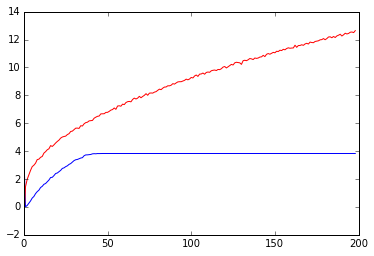

In [14]:
plt.plot(X, Y1[X], 'b', X, Y2[X], 'r')

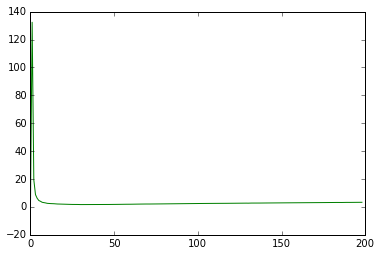

In [17]:
plt.plot(X, ratio_array[X], 'g')

# Visualization of the decision surface

In [29]:
import pylab as pl
from sklearn import neighbors, datasets, tree

In [19]:
mu1 = np.array([3., 3.])
mu2 = np.array([1., 1.])

S1 = np.eye(2)
S2 = np.eye(2)

In [20]:
X1 = npr.multivariate_normal(mu1, S1, 100)
X2 = npr.multivariate_normal(mu2, S2, 100)

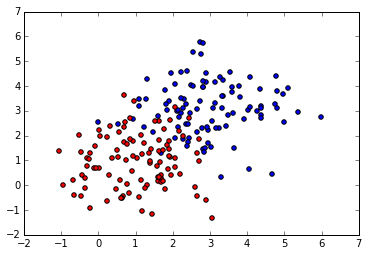

In [22]:
plt.scatter(X1[:,0], X1[:,1], c='b')
plt.scatter(X2[:,0], X2[:,1], c='r')

In [23]:
X = np.vstack([X1, X2])

In [25]:
Y = np.zeros((200,), dtype=int)
Y[100:] = 1

## KNeighborsClassifier

In [26]:
h = .02

knn = neighbors.KNeighborsClassifier()

In [27]:
# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

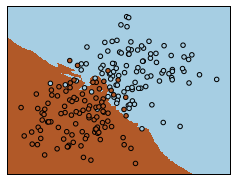

In [28]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y )


pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

## DecisionTreeClassifier

In [30]:
knn = tree.DecisionTreeClassifier()

In [31]:
# we create an instance of Decision Tree Classifier and fit the data.
knn.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

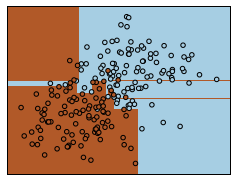

In [32]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y )


pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

In [33]:
import numpy as np
import pandas as pd
import pylab as pl

# kNN and decision tree comparison

In [34]:
data = pd.read_csv('adult.data.csv')

In [36]:
X1 = data.drop(['workclass', 'education', 'marital-status',
                'occupation', 'relationship', 'race',
                'sex', 'native-country', 'salary'], axis=1)

X2 = pd.get_dummies(data.drop(['salary'], axis=1))

Y = data['salary']

In [37]:
from sklearn.cross_validation import train_test_split

In [44]:
X1_train, X1_test, X2_train, X2_test, Y_train, Y_test = train_test_split(X1, X2, Y, test_size=.7, train_size=.3)

In [46]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaled_X1 = StandardScaler().fit(X1_train)
scaled_X2 = StandardScaler().fit(X2_train)

In [52]:
transformed_X1_train = StandardScaler().fit_transform(X1_train)
transformed_X1_test = StandardScaler().fit_transform(X1_test)

transformed_X2_train = StandardScaler().fit_transform(X2_train)
transformed_X2_test = StandardScaler().fit_transform(X2_test)

### kNN-neighbours classifier

In [55]:
# kNN-neighbours classifier
# here will be different of classifiers depending on k
# k would be: (2, 10)

K_VALUES = range(2, 10)

knn_X1 = []
knn_X1_scaled = []

knn_X2 = []
knn_X2_scaled = []

for k in K_VALUES:
    knn_X1.append(neighbors.KNeighborsClassifier(n_neighbors=k))
    knn_X2.append(neighbors.KNeighborsClassifier(n_neighbors=k))
    
    knn_X1_scaled.append(neighbors.KNeighborsClassifier(n_neighbors=k))
    knn_X2_scaled.append(neighbors.KNeighborsClassifier(n_neighbors=k))

    
for k in K_VALUES:
    knn_X1[k - 2].fit(X1_train, Y_train)
    knn_X1_scaled[k - 2].fit(transformed_X1_train, Y_train)
    
    knn_X2[k - 2].fit(X2_train, Y_train)
    knn_X2_scaled[k - 2].fit(transformed_X2_train, Y_train)

for k in K_VALUES:
    print 'knn_X1 score with k = {0} is {1}'.format(k, knn_X1[k - 2].score(X1_test, Y_test))
    print 'knn_X1_scaled score with k = {0} is {1}'.format(k, knn_X1_scaled[k - 2].score(transformed_X1_test, Y_test))
    print 'knn_X2 score with k = {0} is {1}'.format(k, knn_X2[k - 2].score(X2_test, Y_test))
    print 'knn_X2_scaled score with k = {0} is {1}'.format(k, knn_X2_scaled[k - 2].score(transformed_X2_test, Y_test))
    print '\n'


knn_X1 score with k = 2 is 0.780547752809
knn_X1_scaled score with k = 2 is 0.800517907303
knn_X2 score with k = 2 is 0.780723314607
knn_X2_scaled score with k = 2 is 0.803063553371


knn_X1 score with k = 3 is 0.755705758427
knn_X1_scaled score with k = 3 is 0.791959269663
knn_X2 score with k = 3 is 0.755661867978
knn_X2_scaled score with k = 3 is 0.807452598315


knn_X1 score with k = 4 is 0.786472963483
knn_X1_scaled score with k = 4 is 0.808067064607
knn_X2 score with k = 4 is 0.786648525281
knn_X2_scaled score with k = 4 is 0.813728932584


knn_X1 score with k = 5 is 0.772296348315
knn_X1_scaled score with k = 5 is 0.804424157303
knn_X2 score with k = 5 is 0.772340238764
knn_X2_scaled score with k = 5 is 0.813992275281


knn_X1 score with k = 6 is 0.788009129213
knn_X1_scaled score with k = 6 is 0.812324438202
knn_X2 score with k = 6 is 0.788009129213
knn_X2_scaled score with k = 6 is 0.817371839888


knn_X1 score with k = 7 is 0.780240519663
knn_X1_scaled score with k = 7 is 0.80

From all those numbers we can see that KNN scaled test gives the best results at all k during knn-classifying
From selected tested scope (2 – 9) the best value of k is 8 or 9
Standartization makes knn classifying better

### Decision Tree Classifier

In [76]:
# Decision Tree Classifier
# here will be different of classifiers depending on max_depth and min_samples_leaf
# max_depth would be: None, 10 – 20
# min_samples_leaf would be: 1 – 5

MAX_DEPTH = (None, 11, 12, 13, 14, 15, 16, 17, 18, 19)
MIN_SAMPLES = (1, 2, 3, 4, 5)

max_depth_arr = np.arange(10, 21)

dtc_X1 = [[0 for x in range(10)] for x in range(5)] 
dtc_X1_scaled = [[0 for x in range(10)] for x in range(5)]

dtc_X2 = [[0 for x in range(10)] for x in range(5)]
dtc_X2_scaled = [[0 for x in range(10)] for x in range(5)]

for sampl in MIN_SAMPLES:
    for depth in MAX_DEPTH:
        idx1 = sampl - 1
        idx2 = depth - 10 if depth else 0
        dtc_X1[idx1][idx2] = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sampl)
        dtc_X1_scaled[idx1][idx2] = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sampl)
        
        dtc_X2[idx1][idx2] = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sampl)
        dtc_X2_scaled[idx1][idx2] = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sampl)

for sampl in MIN_SAMPLES:
    for depth in MAX_DEPTH:
        idx1 = sampl - 1
        idx2 = depth - 10 if depth else 0
        
        dtc_X1[idx1][idx2].fit(X1_train, Y_train)
        dtc_X1_scaled[idx1][idx2].fit(transformed_X1_train, Y_train)
        
        dtc_X2[idx1][idx2].fit(X2_train, Y_train)
        dtc_X2_scaled[idx1][idx2].fit(transformed_X2_train, Y_train)
        
for sampl in MIN_SAMPLES:
    for depth in MAX_DEPTH:
        idx1 = sampl - 1
        idx2 = depth - 10 if depth else 0
        print 'dtc_X1 score with min_samples_leaf = {0} and max_depth = {1} is {2}'.format(sampl, depth, dtc_X1[idx1][idx2].score(X1_test, Y_test))
        print 'dtc_X1_scaled score with min_samples_leaf = {0} and max_depth = {1} is {2}'.format(sampl, depth, dtc_X1_scaled[idx1][idx2].score(transformed_X1_test, Y_test))
        
        print 'dtc_X2 score with min_samples_leaf = {0} and max_depth = {1} is {2}'.format(sampl, depth, dtc_X2[idx1][idx2].score(X2_test, Y_test))
        print 'dtc_X2_scaled score with min_samples_leaf = {0} and max_depth = {1} is {2}'.format(sampl, depth, dtc_X2_scaled[idx1][idx2].score(transformed_X2_test, Y_test))
        
        
        print '\n'

dtc_X1 score with min_samples_leaf = 1 and max_depth = None is 0.76716116573
dtc_X1_scaled score with min_samples_leaf = 1 and max_depth = None is 0.751799508427
dtc_X2 score with min_samples_leaf = 1 and max_depth = None is 0.809778792135
dtc_X2_scaled score with min_samples_leaf = 1 and max_depth = None is 0.80315133427


dtc_X1 score with min_samples_leaf = 1 and max_depth = 11 is 0.82184866573
dtc_X1_scaled score with min_samples_leaf = 1 and max_depth = 11 is 0.805038623596
dtc_X2 score with min_samples_leaf = 1 and max_depth = 11 is 0.843223314607
dtc_X2_scaled score with min_samples_leaf = 1 and max_depth = 11 is 0.837078651685


dtc_X1 score with min_samples_leaf = 1 and max_depth = 12 is 0.817415730337
dtc_X1_scaled score with min_samples_leaf = 1 and max_depth = 12 is 0.79920119382
dtc_X2 score with min_samples_leaf = 1 and max_depth = 12 is 0.83909761236
dtc_X2_scaled score with min_samples_leaf = 1 and max_depth = 12 is 0.833347963483


dtc_X1 score with min_samples_leaf = 

From all those numbers we can see that DTC scaled test gives the worst results at all depth and min_leaf during DTC-classifying
From selected tested scope the best values are min_samples_leaf = 2 and max_depth = 11
Standartization makes DTC classifying worse